In [1]:
import numpy as np
import matplotlib; matplotlib.rcParams['figure.figsize']=(4,3)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import GPy
from IPython.display import display

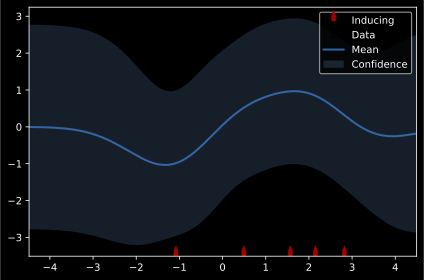

In [2]:
m = GPy.examples.regression.sparse_GP_regression_1D(plot=True, optimize=False)

## Examining the model using print statement

In [3]:
# The Objective shows the log-likelihood
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [4]:
m.inducing_inputs

index,sparse_gp.inducing_inputs,constraints,priors
[0 0],2.15262914,,
[1 0],2.82312473,,
[2 0],1.57118003,,
[3 0],0.49378332,,
[4 0],-1.08098494,,


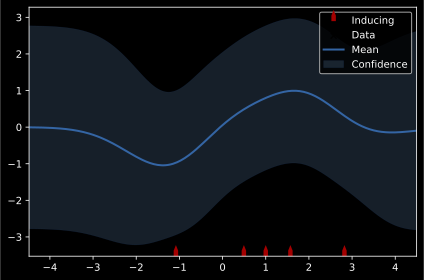

In [5]:
m.inducing_inputs[0] = 1
m.inducing_inputs
fig = m.plot()

## Interacting with parameters

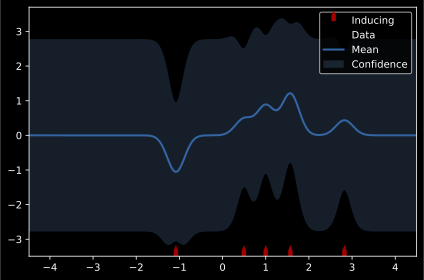

In [6]:
# The Objective shows the log-likelihood has changed to 604 due to change in hyperparameter lengthscale
m.rbf.lengthscale = 0.2
m
fig2= m.plot()

## Regular Expressions

In [7]:
print(m['.*var'])
print("variances as np.array: ", m['.*var'].values())
print("np.array of rbf matches: ", m['.*rbf'].values())

  index  |             sparse_gp.rbf.variance  |  constraints  |  priors
  [0]    |                         1.00000000  |      +ve      |        
  -----  |  sparse_gp.Gaussian_noise.variance  |  -----------  |  ------
  [0]    |                         1.00000000  |      +ve      |        
variances as np.array:  [1. 1.]
np.array of rbf matches:  [1.  0.2]



Name : sparse_gp
Objective : 676.763413887962
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     2.0  |      +ve      |        
  rbf.lengthscale          |     0.2  |      +ve      |        
  Gaussian_noise.variance  |     2.0  |      +ve      |        

Name : sparse_gp
Objective : 703.0415766074093
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     2.0  |      +ve      |        
  rbf.lengthscale          |     0.2  |      +ve      |        
  Gaussian_noise.variance  |     3.0  |      +ve      |        


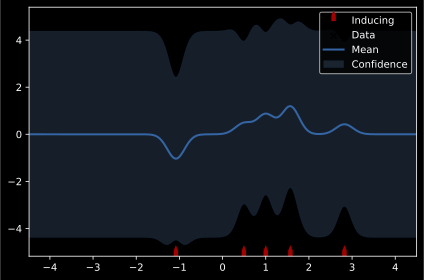

In [8]:
m['.*var']=2
print(m)
m['.*var'] = [2., 3.]
print(m)
fig3 = m.plot()

In [9]:
print(m[''])

  index  |          sparse_gp.inducing_inputs  |  constraints  |  priors
  [0 0]  |                         1.00000000  |               |        
  [1 0]  |                         2.82312473  |               |        
  [2 0]  |                         1.57118003  |               |        
  [3 0]  |                         0.49378332  |               |        
  [4 0]  |                        -1.08098494  |               |        
  -----  |             sparse_gp.rbf.variance  |  -----------  |  ------
  [0]    |                         2.00000000  |      +ve      |        
  -----  |          sparse_gp.rbf.lengthscale  |  -----------  |  ------
  [0]    |                         0.20000000  |      +ve      |        
  -----  |  sparse_gp.Gaussian_noise.variance  |  -----------  |  ------
  [0]    |                         3.00000000  |      +ve      |        


## Setting and fetching parameters: parameter_array

[-4.  -2.   0.   2.   4.   0.1  2.   0.7]

Name : sparse_gp
Objective : 322.56514604343243
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     0.1  |      +ve      |        
  rbf.lengthscale          |     2.0  |      +ve      |        
  Gaussian_noise.variance  |     0.7  |      +ve      |        


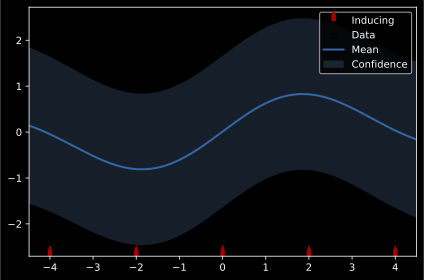

In [10]:
new_params = np.r_[[-4, -2, 0,2,4],[0.1, 2], [0.7]]
print(new_params)
m[:]= new_params
print(m)
fig4 = m.plot()

  index  |  sparse_gp.inducing_inputs  |  constraints  |  priors
  [0 0]  |                -4.00000000  |               |        
  [1 0]  |                -2.00000000  |               |        
  [2 0]  |                 1.00000000  |               |        
  [3 0]  |                 3.00000000  |               |        
  [4 0]  |                 5.00000000  |               |        


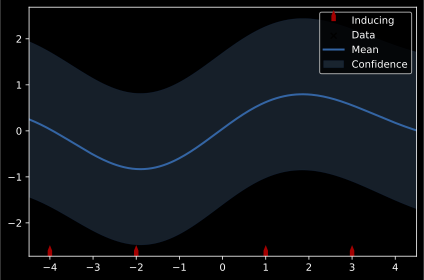

In [11]:
m.inducing_inputs[2:, 0] = [1,3,5]
print(m.inducing_inputs)
fig4 = m.plot()

In [12]:
precision = 1./m.Gaussian_noise.variance
print(precision)

[1.42857143]


## Getting the model Parameter's gradients

all gradients of the model: 
 [   2.29510384    4.03776733    1.31921579   -0.40901145   -0.40031047
  101.72902852  -12.82011997 -267.84617086]

 gradients of the rbf kernel: 
 [101.72902852 -12.82011997]


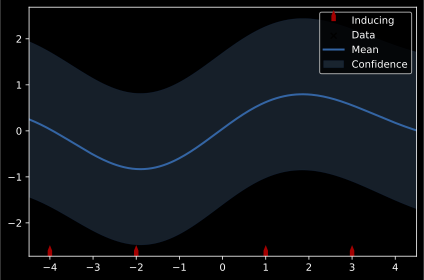

In [13]:
print("all gradients of the model: \n", m.gradient)
print("\n gradients of the rbf kernel: \n", m.rbf.gradient)
fig6 = m.plot()

[-1.43119173e-04  4.88084240e-06 -1.06255512e-04  7.30193482e-05
  6.86763535e-05  4.24625759e-05  3.63116395e-04  3.36077996e-02]


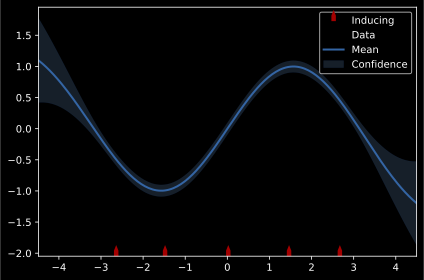

In [14]:
m.optimize()
print(m.gradient)
fig6 = m.plot()

## Adjusting the model's constraints

In [15]:
print(m)


Name : sparse_gp
Objective : -629.1988075423142
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |               |        
  rbf.variance             |     1.2639418557872455  |      +ve      |        
  rbf.lengthscale          |     2.4850188033260037  |      +ve      |        
  Gaussian_noise.variance  |  0.0022010349882464193  |      +ve      |        


In [16]:
# use unconstrain() to remove constrain on a parameter
m.rbf.variance.unconstrain()
print(m)


Name : sparse_gp
Objective : -629.1988075423142
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |               |        
  rbf.variance             |     1.2639418557872455  |               |        
  rbf.lengthscale          |     2.4850188033260037  |      +ve      |        
  Gaussian_noise.variance  |  0.0022010349882464193  |      +ve      |        


In [17]:
m.unconstrain()
print(m)


Name : sparse_gp
Objective : -629.1988075423142
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |               |        
  rbf.variance             |     1.2639418557872455  |               |        
  rbf.lengthscale          |     2.4850188033260037  |               |        
  Gaussian_noise.variance  |  0.0022010349882464193  |               |        



Name : sparse_gp
Objective : -629.1988075423142
Number of Parameters : 8
Number of Optimization Parameters : 7
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |    {fixed}    |        
  rbf.variance             |     1.2639418557872455  |      +ve      |        
  rbf.lengthscale          |     2.4850188033260037  |      +ve      |        
  Gaussian_noise.variance  |  0.0022010349882464193  |               |        

Name : sparse_gp
Objective : -629.1988075423142
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                  value  |  constraints  |  priors
  inducing_inputs          |                 (5, 1)  |               |        
  rbf.variance             |     1.2639418557872455  |      +ve      |        
  rbf.lengthscale          |     2.4850188033260037  |      +ve      |        
  Gaussian_

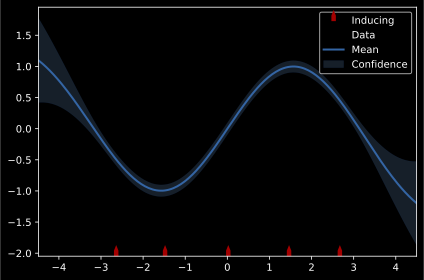

In [18]:
m.inducing_inputs[0].fix()
m.rbf.constrain_positive()
print(m)
m.unfix()
print(m)
fig6 = m.plot()

## Tying Parameters

### Optimizing the model

In [20]:
m.Gaussian_noise.constrain_positive()
m.rbf.constrain_positive()
m.optimize()
display(m)

reconstraining parameters sparse_gp.Gaussian_noise
reconstraining parameters sparse_gp.rbf


sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.2639423000402639,+ve,
rbf.lengthscale,2.4850197629906003,+ve,
Gaussian_noise.variance,0.002201035438609372,+ve,



Name : sparse_gp
Objective : -629.1988075430199
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                 value  |  constraints  |  priors
  inducing_inputs          |                (5, 1)  |               |        
  rbf.variance             |    1.2639423000402639  |      +ve      |        
  rbf.lengthscale          |    2.4850197629906003  |      +ve      |        
  Gaussian_noise.variance  |  0.002201035438609372  |      +ve      |        


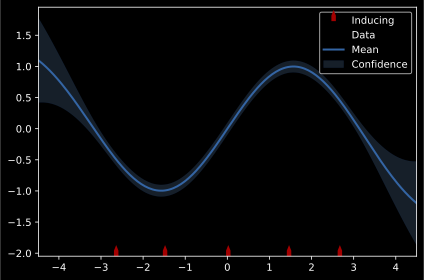

In [21]:
print(m)
fig8 = m.plot()

In [103]:
# GPy.plotting.change_plotting_library('plotly')
# fig10 = m.plot(plot_density=True)
# GPy.plotting.show(fig, filename='gpy_sparse_gp_example')

In [22]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0003   1.709717e+01   1.183104e+02 
    00s04  0005  -3.541924e+00   8.972390e+02 
    00s08  0011  -2.135276e+01   3.701471e+00 
    00s10  0014  -2.198296e+01   2.670131e-02 
    00s14  0019  -2.198777e+01   5.306542e-08 
Runtime:     00s14
Optimization status: Converged



In [23]:
print (np.shape(X))
print(np.shape(Y))

(50, 2)
(50, 1)


 C:\Users\sinad\anaconda3\envs\NeuroGaussianProcess\lib\site-packages\GPy\plotting\matplot_dep\plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


GP_regression.,value,constraints,priors
sum.Mat52.variance,0.34259885300796655,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,0.0006468119665088163,+ve,
Gaussian_noise.variance,0.0006468119665088163,+ve,


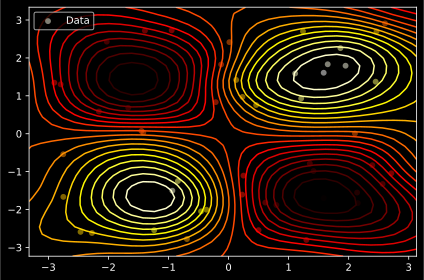

In [24]:
fig = m.plot()
# display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))
display(m)